In [0]:
import matplotlib.pyplot as plt

from Utils.UtilsViz import *
from Utils.DataExtractor import DataExtractor

In [2]:
# Read the data from the database
db_extractor = DataExtractor()
db = "kdd_2014"
cols_to_select = ["projectid", "schoolid", "teacher_acctid", 
                  "school_latitude", "school_longitude", 
                  "total_price_including_optional_support",
                  "total_price_excluding_optional_support",
                  "primary_focus_subject",
                  "primary_focus_area",
                  "poverty_level", "resource_type",
                  "students_reached",
                  "year", "month", "day", "date_posted"]
cols_to_select_str = ','.join(cols_to_select)
table_name = "projects"
query = "SELECT " + cols_to_select_str + " FROM " + table_name + ";"
projects_data = db_extractor.read_db(db="kdd_2014", query=query, host="localhost", user="root", pwd="root")
projects_data.head()

,projectid,schoolid,teacher_acctid,school_latitude,school_longitude,total_price_including_optional_support,total_price_excluding_optional_support,primary_focus_subject,primary_focus_area,poverty_level,resource_type,students_reached,year,month,day,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,c0e6ce89b244764085691a1b8e28cb81,42d43fa6f37314365d08692e08680973,36.576340,-119.608713,653.89,555.81,Literature & Writing,Literacy & Language,highest poverty,Books,32.0,2014,5,12,2014-05-12
1,90de744e368a7e4883223ca49318ae30,d711e47810900c96f26a5d0be30c446d,864eb466462bf704bf7a16a585ef296a,32.911179,-96.723640,348.79,296.47,Literacy,Literacy & Language,highest poverty,Books,22.0,2014,5,12,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,665c3613013ba0a66e3a2a26b89f1b68,37f85135259ece793213aca9d8765542,45.166039,-122.414576,506.93,430.89,Literacy,Literacy & Language,high poverty,Technology,17.0,2014,5,11,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,4f12c3fa0c1cce823c7ba1df57e90ccb,2133fc46f951f1e7d60645b0f9e48a6c,40.641727,-73.965655,677.73,576.07,Social Sciences,History & Civics,highest poverty,Books,12.0,2014,5,11,2014-05-11
4,24761b686e18e5eace634607acbcc19f,10179fd362d7b8cf0e89baa1ca3025bb,867ff478a63f5457eaf41049536c47cd,34.043939,-118.288371,480.47,408.40,Mathematics,Math & Science,highest poverty,Other,24.0,2014,5,11,2014-05-11


In [3]:
print("Number of project IDs :", projects_data["projectid"].unique().shape[0])
print("Number of School IDs :", projects_data["schoolid"].unique().shape[0])
print("Number of Teacher accounts :", projects_data["teacher_acctid"].unique().shape[0])

Number of project IDs : 664098


Number of School IDs : 57004


Number of Teacher accounts : 249555


In [5]:
# Plot how the number of projects have increased based on time.
for year in projects_data["year"].unique():
    print("For year", year, " we have ", end="")
    print(projects_data[projects_data["year"]==year]["month"].unique().shape[0], end="")
    print(" months of data -->", end=" ")
    print(projects_data[projects_data["year"]==year]["month"].unique())

For year 2014  we have 5 months of data --> [5 4 3 2 1]
For year 2013  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2012  we have 12 months of data --> 

[12 11 10  9  8  7  6  5  4  3  2  1]
For year 2011  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2010  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2009  we have 12 months of data --> 

[12 11 10  9  8  7  6  5  4  3  2  1]
For year 2008  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2007  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2006  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2005  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2004  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2003  we have 12 months of data --> [12 11 10  9  8  7  6  5  4  3  2  1]
For year 2002  we have 4 months of data --> [12 11 10  9]


In [6]:
# Sadly we're going to ignore two years of data once again. 
# Let's start from 2003 to maintain consistency with the project data
years_to_ignore = [2002, 2014]
projects_data = projects_data[~projects_data["year"].isin(years_to_ignore)]  

In [4]:
t_p_grp = projects_data[["teacher_acctid", "projectid"]].groupby(by="teacher_acctid", as_index=False).count()

In [5]:
tp_summary = t_p_grp["projectid"].describe()
print("Average number of projects per teachers :", tp_summary["mean"])
print("Most number of projects teacher(s) posted :", tp_summary["max"])
print("Least number of projects teacher(s) posted :", tp_summary["min"])


Average number of projects per teachers : 2.661128809280519
Most number of projects teacher(s) posted : 266.0
Least number of projects teacher(s) posted : 1.0


In [6]:
bins = [0, 10, 25, 50, 100, 200, 300]
dfbins = pd.cut(t_p_grp['projectid'], bins)
agg_tp_grp = t_p_grp.groupby(dfbins, as_index=False)['projectid'].agg(['count'])
agg_tp_grp = agg_tp_grp.reset_index(drop=False)
agg_tp_grp.columns = ["num_projects", "num_teachers"]
agg_tp_grp

,num_projects,num_teachers
0,"(0, 10]",241561
1,"(10, 25]",5968
2,"(25, 50]",1434
3,"(50, 100]",487
4,"(100, 200]",99
5,"(200, 300]",6


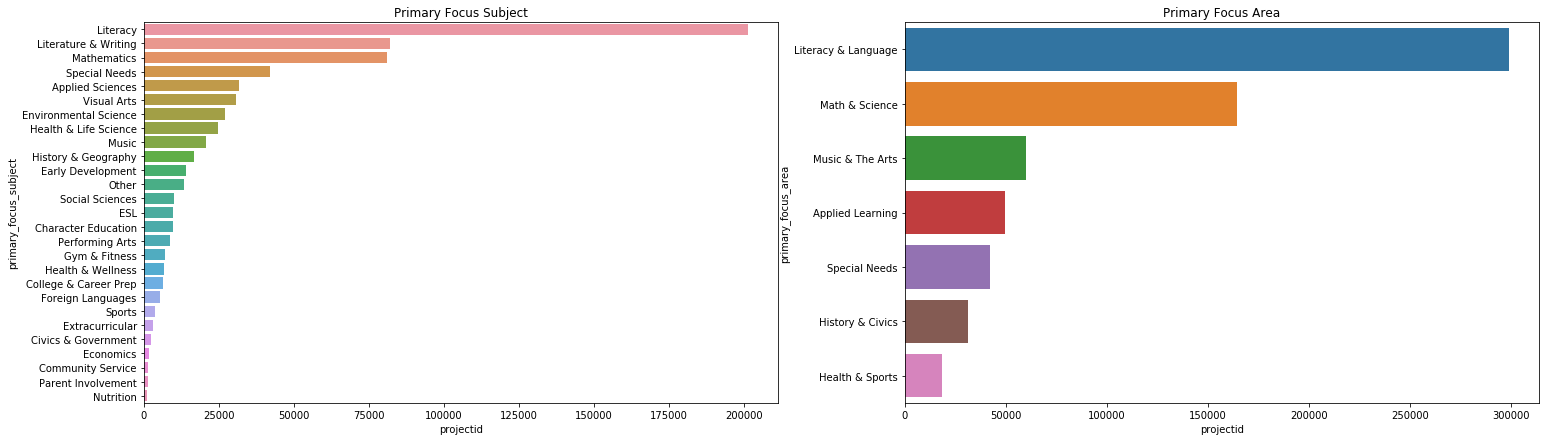

In [11]:
pfocus_sub_data = \
    projects_data[["projectid", "primary_focus_subject"]].groupby(by="primary_focus_subject", as_index=False).count()
pfocus_sub_data.sort_values(by="projectid", inplace=True, ascending=False)

pfocus_area_data = \
    projects_data[["projectid", "primary_focus_area"]].groupby(by="primary_focus_area", as_index=False).count()
pfocus_area_data.sort_values(by="projectid", inplace=True, ascending=False)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
g = sns.barplot(y="primary_focus_subject", x="projectid", data=pfocus_sub_data, ax=ax1, )
g = g.set(title="Primary Focus Subject")
g = sns.barplot(y="primary_focus_area", x="projectid", data=pfocus_area_data, ax=ax2)
g = g.set(title="Primary Focus Area")

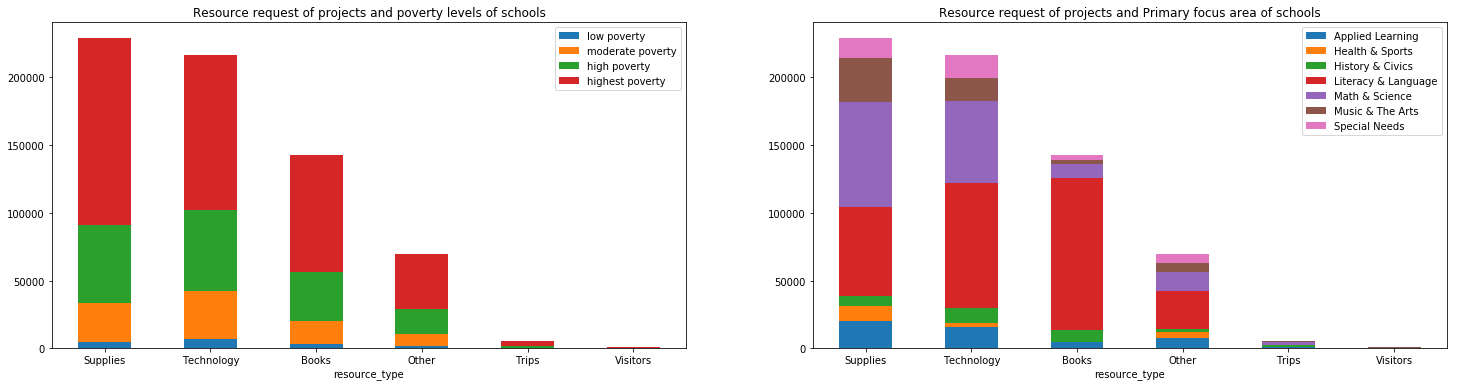

In [38]:
pov_res_cols = projects_data[["poverty_level", "resource_type"]]
pov_res_grp = group_and_sort(pov_res_cols, "poverty_level", "resource_type")
# Let's just rearrange the columns for helping visualizations
cols = ["highest poverty", "high poverty", "moderate poverty", "low poverty"]
pov_res_grp = pov_res_grp[cols[::-1]]

# Just out of curiosity, is there a relation between resource type and primary focus area of the school?
res_pfa_cols = projects_data[["resource_type", "primary_focus_area"]]
res_pfa_grp = group_and_sort(res_pfa_cols, "primary_focus_area", "resource_type")

# Plot the graps
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))
g1 = pov_res_grp.plot(kind="bar", stacked=True, rot=0, ax=ax1)
ret = ax1.set_title("Resource request of projects and poverty levels of schools")
g2 = res_pfa_grp.plot(kind="bar", stacked=True, rot=0, ax=ax2)
ret2 = ax2.set_title("Resource request of projects and Primary focus area of schools") 

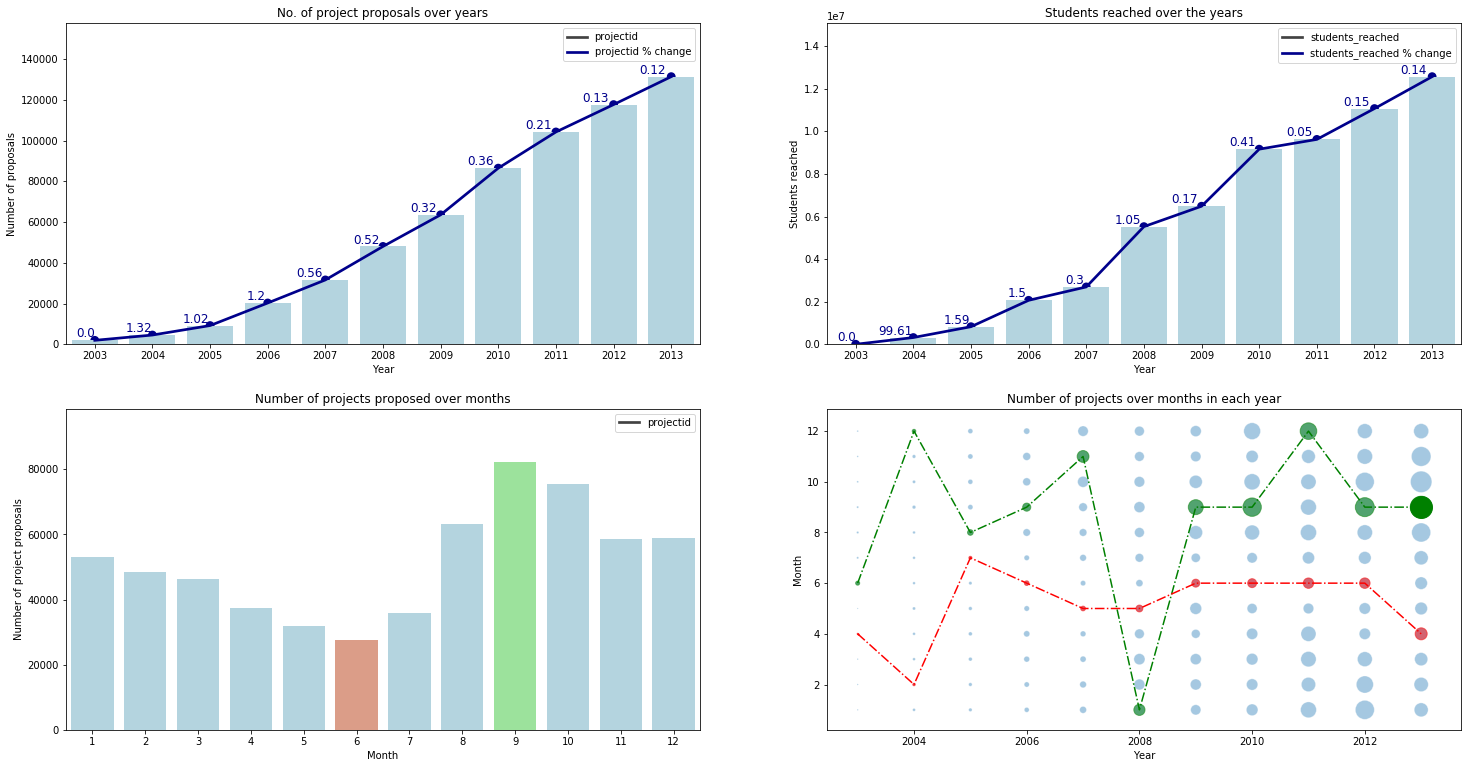

In [19]:
# Make subset of time data without years 2002 and 2014
time_study = projects_data[["projectid", "students_reached", "year", "month", "day"]]
year_group = time_study[["projectid", "year"]].groupby(by="year", as_index=False).count()
month_group = time_study[["projectid", "month"]].groupby(by="month", as_index=False).count()
students_reached = time_study.groupby(by="year", as_index=False).sum()
month_year_group = \
    time_study[["year", "month", "projectid"]].\
        groupby(by=["year", "month"], as_index=False).count()
month_year_group["scaled_count"] = (month_year_group["projectid"] / month_year_group["projectid"].max()) * 1000

f, ax = plt.subplots(2, 2, figsize=(25,13))
plot_bar_timegraph(x="year", y="projectid", data=year_group, ax=ax[0][0],
                   title="No. of project proposals over years", xlabel="Year", ylabel="Number of proposals")
plot_bar_timegraph(x="year", y="students_reached", data=students_reached, ax=ax[0][1],
                   title="Students reached over the years", xlabel="Year", ylabel="Students reached")
plot_bar_timegraph(x="month", y="projectid", data=month_group, ax=ax[1][0], 
                    highlight_max_min=True, point_plot=False, annot=False,
                   title="Number of projects proposed over months", xlabel="Month",
                   ylabel="Number of project proposals")
plot_bubblehist(x="year", y="month", s="scaled_count", data=month_year_group, 
                title="Number of projects over months in each year", 
                xlabel="Year", ylabel="Month", ax=ax[1][1])


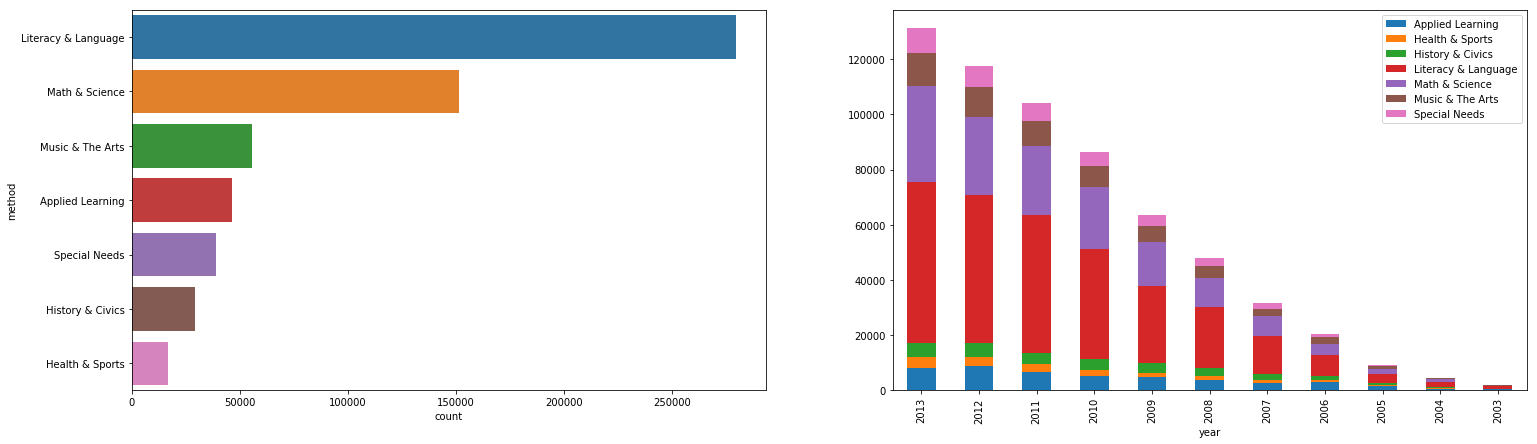

In [8]:
# What was the most popular focus area over the years to receive funding?
focus_area = projects_data[["primary_focus_area", "year", "month"]]
focus_area_counts = focus_area["primary_focus_area"].value_counts().to_frame().reset_index(drop=False)
focus_area_counts.columns = ["method", "count"]

cols = ["primary_focus_area", "year"]
farea_year_group = group_and_sort(dataframe=focus_area[cols],  dummycol="primary_focus_area", groupbycol="year")
farea_year_group.sort_index(inplace=True, ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(25,7))
g = sns.barplot(x="count", y="method", data=focus_area_counts, ax=ax[0])
g = farea_year_group.plot(kind="bar", stacked=True, ax=ax[1]) 

In [16]:
# Would we find any correlation between certain sets of variables? 
# total_price_in(ex)cluding_optional_support pair"
corr = np.round(projects_data[["total_price_including_optional_support", 
                               "total_price_excluding_optional_support"]].corr(), 2)
corr

,total_price_including_optional_support,total_price_excluding_optional_support
total_price_including_optional_support,1.0,1.0
total_price_excluding_optional_support,1.0,1.0


In [17]:
# Let's look at the distribution of the data in numbers
projects_data[projects_data["total_price_including_optional_support"]>0][
    "total_price_including_optional_support"].describe()

count    6.185260e+05
mean     6.382994e+02
std      1.601605e+04
min      1.098000e+01
25%      3.178900e+02
50%      4.878600e+02
75%      6.902400e+02
max      1.250002e+07
Name: total_price_including_optional_support, dtype: float64

In [18]:
bins = [0, 500, 1e3, 1e4, 1e5, 1e6, int(projects_data["total_price_including_optional_support"].max()+1)]
dfbins = pd.cut(projects_data['total_price_including_optional_support'], bins)
agg_grp = projects_data.groupby(dfbins, as_index=False)['total_price_including_optional_support'].agg(['count'])
agg_grp = agg_grp.reset_index(drop=False)
agg_grp.columns = ["price_bin", "num_projects"]
agg_grp

,price_bin,num_projects
0,"(0.0, 500.0]",321104
1,"(500.0, 1000.0]",235554
2,"(1000.0, 10000.0]",61168
3,"(10000.0, 100000.0]",692
4,"(100000.0, 1000000.0]",6
5,"(1000000.0, 12500021.0]",2
